In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [2]:
path_hyy = "/scratch/dongelr1/susannar/kesa2024/data/hyytiala/preprocessed"
path_bei = "/scratch/dongelr1/susannar/kesa2024/data/beijing/preprocessed"
target_dir = "/scratch/dongelr1/susannar/kesa2024/results2025"

### Correlation plots

In [3]:
def load_data(data_dir):
    #all_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.csv')]
    #dfs = [pd.read_csv(f) for f in all_files]
    #combined_df = pd.concat(dfs, ignore_index=True)
    #return dfs
    
    all_files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]
    dfs = {}

    for file in all_files:
        # Derive a name for the dataframe from the filename (without extension)
        name = os.path.splitext(file)[0]  # removes .csv extension
        name = name.replace(" ", "_").replace("-", "_")  # optional cleanup
        file_path = os.path.join(data_dir, file)
        dfs[name] = pd.read_csv(file_path)

    return dfs

def create_corr_plots(df, cols=[], fname=""):
    for name, df in df.items():
        # If no columns defined, keep all except string
        if len(cols) == 0:
            # Keep only numeric columns
            df = df.select_dtypes(include='number')
        else:
            df = df[cols]
        
        # Compute the correlation matrix
        corr = df.corr()
        corr = corr.sort_index(key=lambda x: x.str.lower()) \
                  .sort_index(axis=1, key=lambda x: x.str.lower())
        #sort_order = corr.abs().sum().sort_values(ascending=False).index
        # Reorder rows and columns
        #corr = corr.loc[sort_order, sort_order]
        
        # Generate a mask for the upper triangle
        mask = np.triu(np.ones_like(corr, dtype=bool))

        # Set up the matplotlib figure
        f, ax = plt.subplots(figsize=(11, 9))

        # Generate a custom diverging colormap
        #cmap = sns.diverging_palette(230, 20, as_cmap=True)
        
        # Draw the heatmap with the mask and correct aspect ratio
        ax = sns.heatmap(corr, mask=mask, annot=True, cmap="coolwarm", vmax=.3, center=0,
                    square=True, linewidths=.5, cbar_kws={"shrink": .5})

        #plt.title(f"{name}")
        plt.tight_layout()

        target_path = os.path.join(target_dir, "".join(["corr_", fname, "_", name, ".png"]))
        plt.savefig(target_path, dpi=300, bbox_inches="tight")
        plt.show()
        
        # Plot the heatmap
        #plt.figure(figsize=(10, 8))
        #sns.heatmap(corr, annot=False, fmt=".2f", cmap='coolwarm')
        #sns.set_style(style="white")
        #plt.title(f"{name}")
        #plt.tight_layout()
        #plt.show()

def create_corr_plot(df, cols=[], fname=""):
    if len(cols) == 0:
        # Keep only numeric columns
        df = df.select_dtypes(include='number')
    else:
        df = df[cols]
    
    # Compute the correlation matrix
    corr = df.corr()
    corr = corr.sort_index(key=lambda x: x.str.lower()) \
              .sort_index(axis=1, key=lambda x: x.str.lower())
    
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    #cmap = sns.diverging_palette(230, 20, as_cmap=True)
    
    # Draw the heatmap with the mask and correct aspect ratio
    ax = sns.heatmap(corr, mask=mask, annot=True, cmap="coolwarm", vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

    #plt.title(f"{name}")
    plt.tight_layout()

    target_path = os.path.join(target_dir, "".join(["corr_", fname, ".png"]))
    plt.savefig(target_path, dpi=300, bbox_inches="tight")
    print(f"Correlation plot saved to {target_path}")
    plt.show()

#d_hyy["unfiltered"].corr()
#plt.matshow(dataframe.corr())
#plt.show()

#### Hyytiälä correlation plots

['global_radiation', 'NOx', 'SO2', 'ToL', 'relative_humidity', 'temp_K', 'wdir_sin', 'CS_rate', 'UVB', 'wind_speed', 'SA_cm3', 'O3', 'wdir_cos']
Correlation plot saved to /scratch/dongelr1/susannar/kesa2024/results2025/corr_corr_hyytiälä_all_uvb_so2_filtered.png


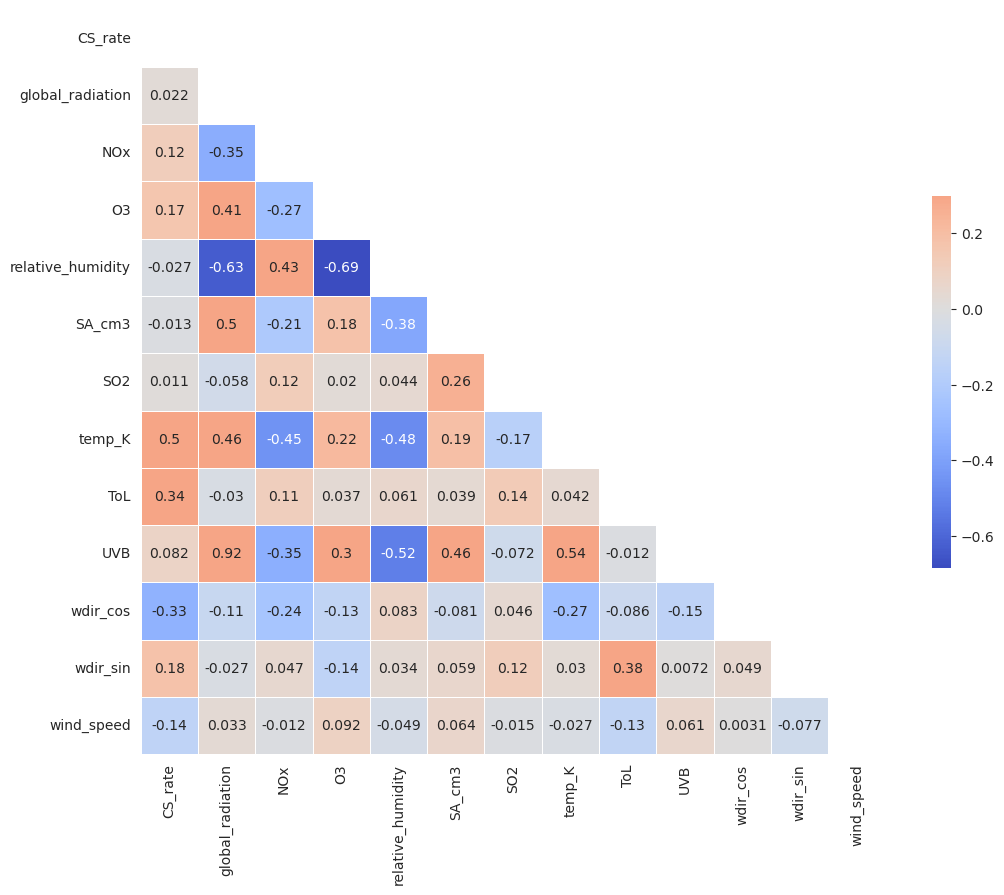

['global_radiation', 'NOx', 'SO2', 'ToL', 'relative_humidity', 'temp_K', 'CS_rate', 'UVB', 'SA_cm3', 'O3']
Correlation plot saved to /scratch/dongelr1/susannar/kesa2024/results2025/corr_corr_hyytiälä_sel_uvb_so2_filtered.png


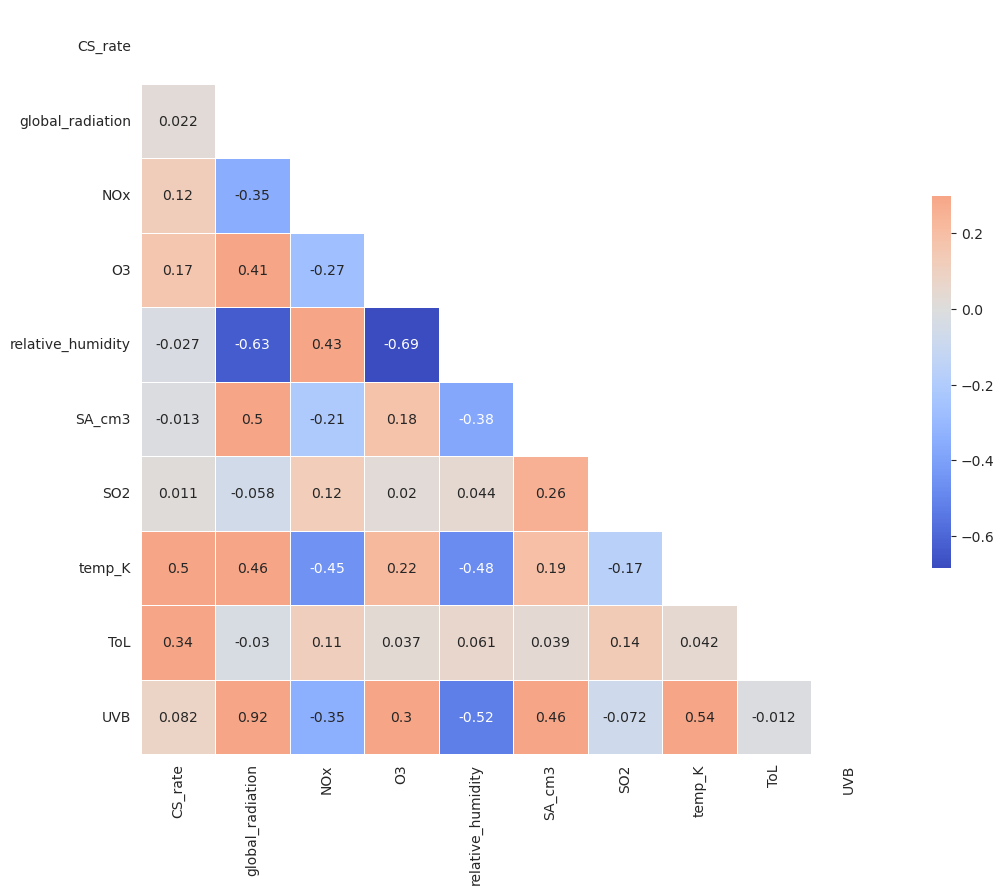

['SO2', 'relative_humidity', 'temp_K', 'CS_rate', 'UVB', 'SA_cm3']
Correlation plot saved to /scratch/dongelr1/susannar/kesa2024/results2025/corr_corr_hyytiälä_top5_uvb_so2_filtered.png


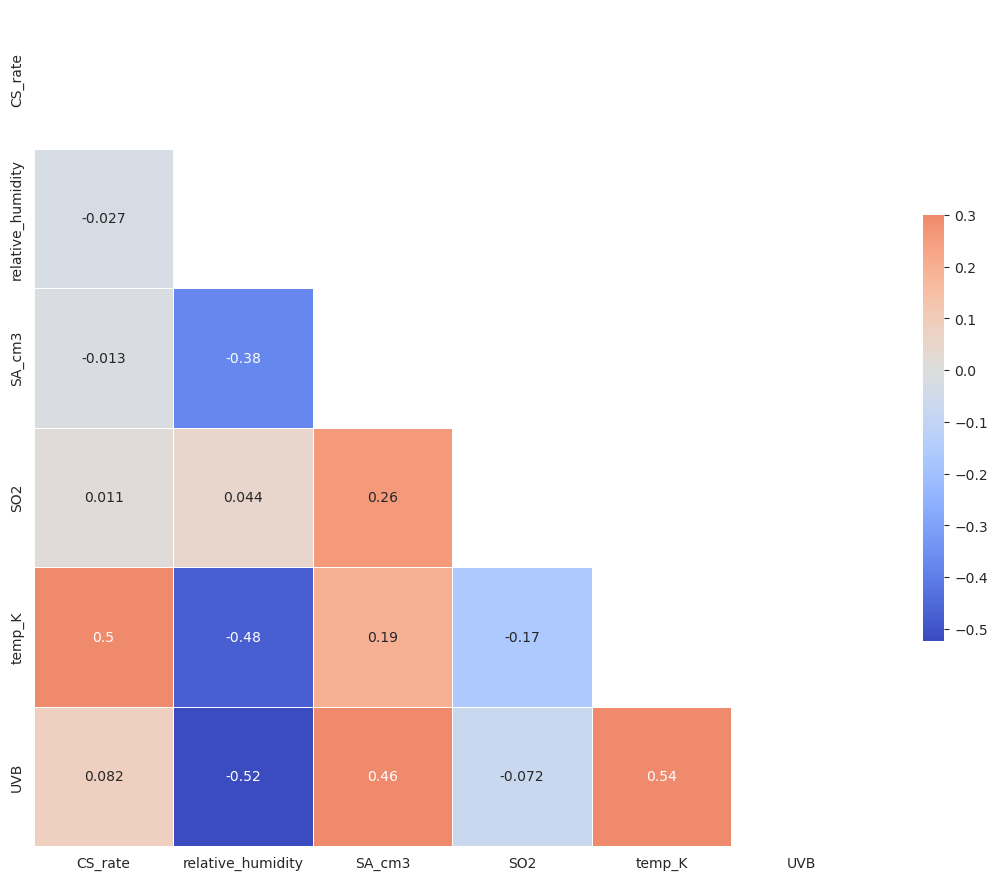

In [38]:

# Select specific columns: create correlation plot only for SA, UVB and SO2
#columns = ['b', 'c']
#df1 = pd.DataFrame(df, columns=columns)

d_hyy = load_data(path_hyy)
dataset = "uvb_so2_filtered"
df = d_hyy[dataset]

excl = ["air_pressure", "hour_sin", "hour_cos", "sector.mixed", "sector.east", "sector.europe", "sector.clean", "Time"]
cols = list(set(d_hyy["unfiltered"].keys()).difference(set(excl)))
print(cols)

create_corr_plot(df, cols, "_".join(["corr_hyytiälä_all", dataset]))

excl = ["air_pressure", "wind_speed", "wdir_sin", "wdir_cos", "hour_sin", "hour_cos", "sector.mixed", "sector.east", "sector.europe", "sector.clean", "Time"]
cols = list(set(d_hyy["unfiltered"].keys()).difference(set(excl)))
print(cols)

create_corr_plot(df, cols, "_".join(["corr_hyytiälä_sel", dataset]))

excl = ["air_pressure", "global_radiation", "NOx", "O3", "ToL", "wind_speed", "wdir_sin", "wdir_cos", "hour_sin", "hour_cos", "sector.mixed", "sector.east", "sector.europe", "sector.clean", "Time"]
cols = list(set(d_hyy["unfiltered"].keys()).difference(set(excl)))
print(cols)

create_corr_plot(df, cols, "_".join(["corr_hyytiälä_top5", dataset]))

#create_corr_plots(d_hyy, cols, "hyytiälä_top5")
#d_hyy["unfiltered"].keys()

['wind_speed', 'CS_rate', 'UVB', 'relative_humidity', 'wdir_sin', 'temp_K', 'SO2', 'SA_cm3', 'wdir_cos', 'ToL', 'NOx', 'O3']
Correlation plot saved to /scratch/dongelr1/susannar/kesa2024/results2025/corr_corr_bei_all_unfiltered.png


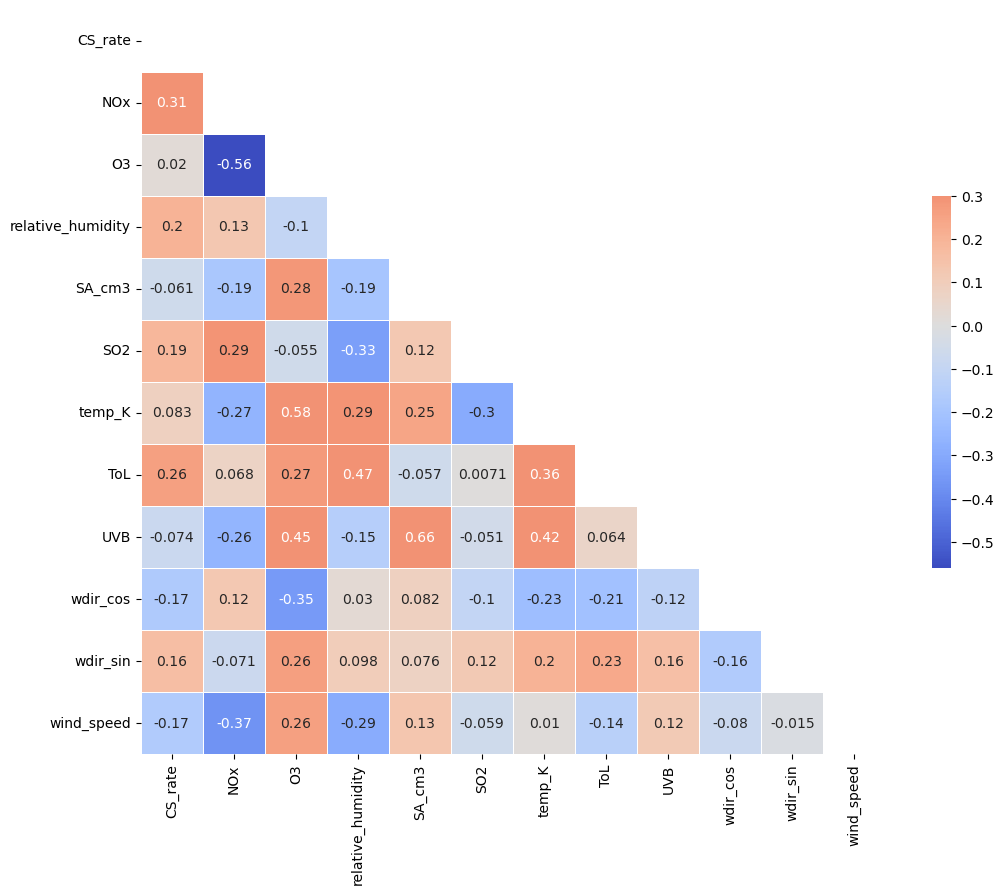

['CS_rate', 'UVB', 'relative_humidity', 'temp_K', 'SO2', 'SA_cm3', 'ToL', 'NOx', 'O3']
Correlation plot saved to /scratch/dongelr1/susannar/kesa2024/results2025/corr_corr_bei_sel_unfiltered.png


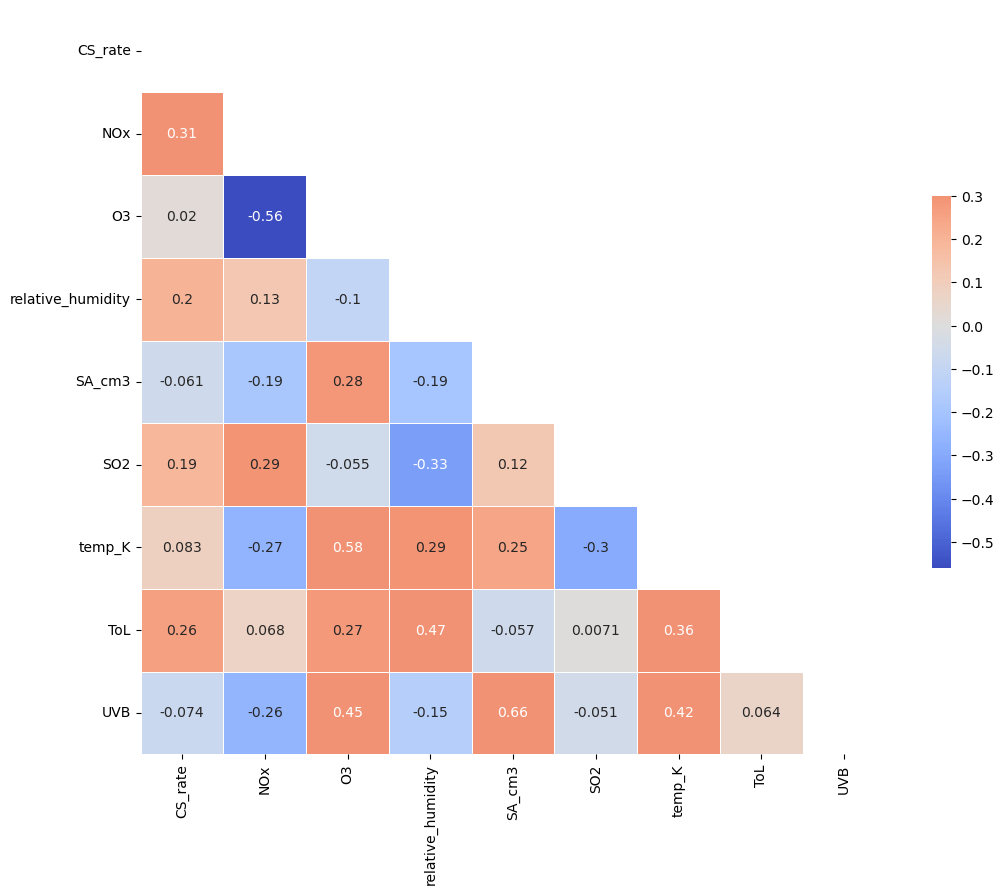

['CS_rate', 'UVB', 'relative_humidity', 'temp_K', 'SO2', 'SA_cm3']
Correlation plot saved to /scratch/dongelr1/susannar/kesa2024/results2025/corr_corr_bei_shared_top5_unfiltered.png


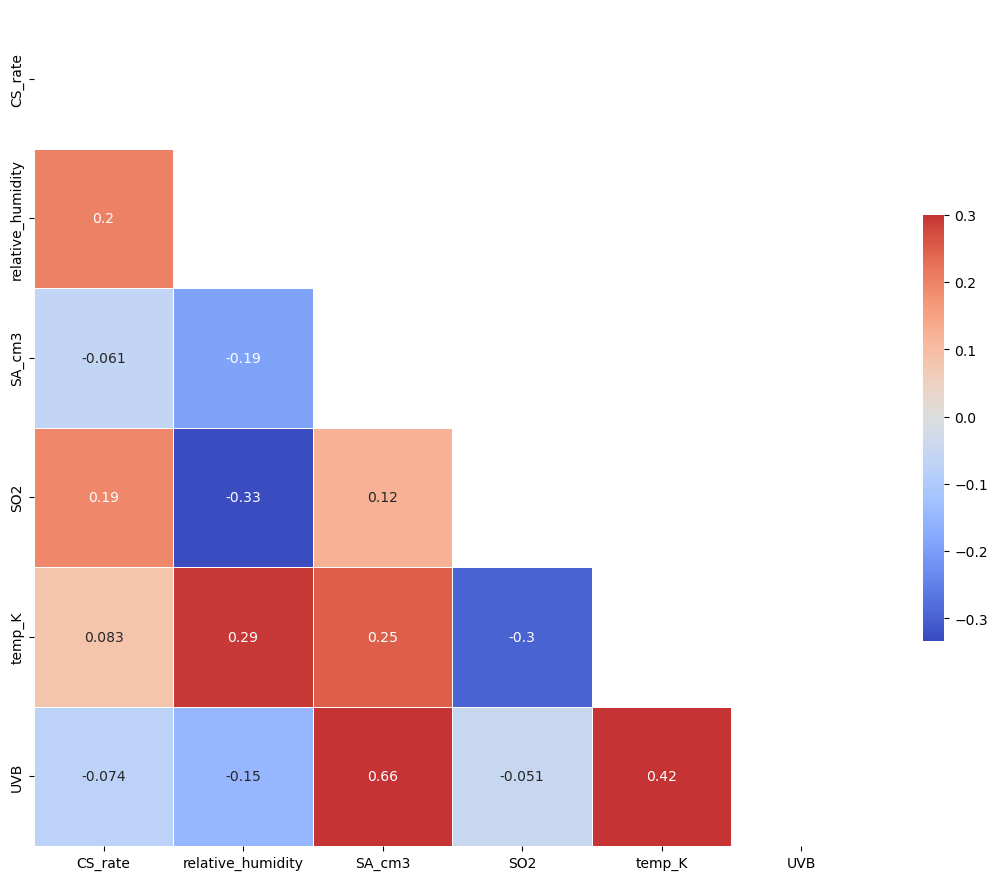

['UVB', 'relative_humidity', 'temp_K', 'SO2', 'SA_cm3', 'O3']
Correlation plot saved to /scratch/dongelr1/susannar/kesa2024/results2025/corr_corr_bei_top5_unfiltered.png


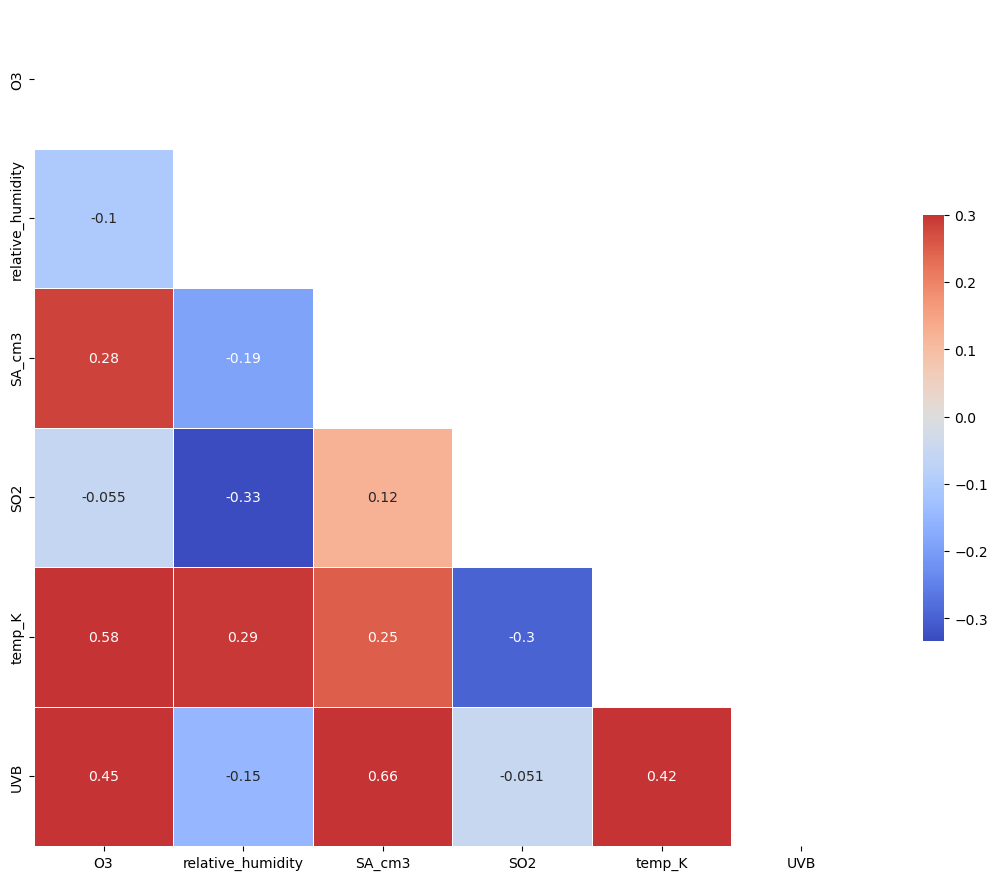

In [4]:
d_bei = load_data(path_bei)
dataset = "uvb_so2_filtered"
dataset = "unfiltered"
df = d_bei[dataset]

excl = ["air_pressure", "hour_sin", "hour_cos", "sector", "Time"]
cols = list(set(d_bei["unfiltered"].keys()).difference(set(excl)))
print(cols)

create_corr_plot(df, cols, "_".join(["corr_bei_all", dataset]))

excl = ["air_pressure", "wind_speed", "wdir_sin", "wdir_cos", "hour_sin", "hour_cos", "sector", "Time"]
cols = list(set(d_bei["unfiltered"].keys()).difference(set(excl)))
print(cols)

create_corr_plot(df, cols, "_".join(["corr_bei_sel", dataset]))

excl = ["air_pressure", "global_radiation", "NOx", "O3", "ToL", "wind_speed", "wdir_sin", "wdir_cos", "hour_sin", "hour_cos", "sector", "Time"]
cols = list(set(d_bei["unfiltered"].keys()).difference(set(excl)))
print(cols)

create_corr_plot(df, cols, "_".join(["corr_bei_shared_top5", dataset]))

excl = ["air_pressure", "global_radiation", "NOx", "CS_rate", "ToL", "wind_speed", "wdir_sin", "wdir_cos", "hour_sin", "hour_cos", "sector", "Time"]
cols = list(set(d_bei["unfiltered"].keys()).difference(set(excl)))
print(cols)

create_corr_plot(df, cols, "_".join(["corr_bei_top5", dataset]))

### Data summary


#### Hyytiälä

In [5]:
dat = load_data(path_hyy)
print(dat)
#d_unf = dat["unfiltered"]
df = dat["uvb_so2_filtered"]

cols_with_units = {'CS': "", 'UVB': "W/m^{-2}", 'O$_3$': "ppb", 'global radiation': "W/m^{-2}", 'NO$_x$': "ppb",
         'SA': "1/cm^3", 'relative_humidity': "%", 'ToL': "h", 'temp': "K", 'SO$_2$': "ppb"}

summary = df[cols].agg(['mean', 'median', 'std', lambda x: x.quantile(0.05), lambda x: x.quantile(0.95)])
summary.index = ["mean", "median", "std", "5 %", "95 %"]
summary = summary.T

def format_value(val, col_name):
    if col_name == "SA_cm3" and abs(val) >= 1e5:
        return f"{val:.2e}"  # scientific notation
    elif abs(val) < 1e-2:
        return f"{val:.4f}"
    #elif col_name == "temp_K":
    #    c = val - 273.15
    #    return f"{val:.2f} ({(val - 273.15):.2f})"
    else:
        return round(val, 3)

# Apply formatting row-wise
formatted_summary = summary.copy()
for col in summary.columns:
    formatted_summary[col] = summary.apply(lambda row: format_value(row[col], row.name), axis=1)

#formatted_summary
#formatted_summary.index = [f"{key} {value}" for key, value in cols_with_units.items()]

target_path = os.path.join(target_dir, ".".join(["hyytiälä_summary_uvb_so2_filtered", "csv"]))
formatted_summary.to_csv(target_path)
print(f"Summary saved to {target_path}")

{}


KeyError: 'uvb_so2_filtered'

#### Beijing

In [51]:
dat = load_data(path_bei)
#d_unf = dat["unfiltered"]
df = dat["unfiltered"]

cols_with_units = {'CS': "", 'UVB': "W/m^{-2}", 'O$_3$': "ppb", 'global radiation': "W/m^{-2}", 'NO$_x$': "ppb",
         'SA': "1/cm^3", 'relative_humidity': "%", 'ToL': "h", 'temp': "K", 'SO$_2$': "ppb"}

summary = df[cols].agg(['mean', 'median', 'std', lambda x: x.quantile(0.5), lambda x: x.quantile(0.95)])
summary.index = ["mean", "median", "std", "5 %", "95 %"]
summary = summary.T

def format_value(val, col_name):
    if col_name == "SA_cm3" and abs(val) >= 1e5:
        return f"{val:.2e}"  # scientific notation
    elif abs(val) < 1e-2:
        return f"{val:.4f}"
    #elif col_name == "temp_K":
    #    c = val - 273.15
    #    return f"{val:.2f} ({(val - 273.15):.2f})"
    else:
        return round(val, 3)

# Apply formatting row-wise
formatted_summary = summary.copy()
for col in summary.columns:
    formatted_summary[col] = summary.apply(lambda row: format_value(row[col], row.name), axis=1)

formatted_summary
#formatted_summary.index = [f"{key} {value}" for key, value in cols_with_units.items()]

target_path = os.path.join(target_dir, ".".join(["beijing_summary_unfiltered", "csv"]))
formatted_summary.to_csv(target_path)
print(f"Summary saved to {target_path}")

Summary saved to /scratch/dongelr1/susannar/kesa2024/results2025/beijing_summary_unfiltered.csv
